***ANLY535 Lab 1: Team 2
Group members: 
Gaurav Gade
Nihar Garlapati
Divyani Kanawat
Aditya Sameer Malik


In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

hello =tf.constant('Hello, TensorFlow!')
print(hello)

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()


Q1: Use same method that explain in lecture to show first 6 elements of the dataset.You should see:

tf.constant creates a constant tensor from a tensor-like object. The resulting tensor is populated with values of type dtype, as specified by arguments value and optionally shape. It comes from the value being embedded in a Const node in the tf.Graph and is useful for asserting that the value can be embedded that way. If the argument dtype is not specified, then the type is inferred from the type of value.

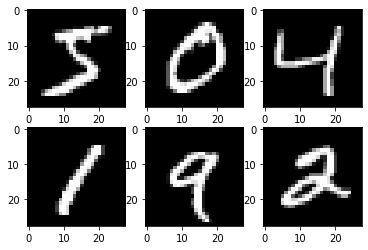

In [3]:
for i in range(6):
    # define subplot
    plt.subplot(2, 3, 1 + i)
    
    # plot raw pixel data
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
    # show the figure
plt.show()

Q2-Normalize the data by dividing the values by 255.

In [4]:
X_train = X_train / 255
X_test = X_test / 255

In [5]:
model = tf.keras.models.Sequential([
 tf.keras.layers.Flatten(input_shape=(28, 28)),
 tf.keras.layers.Dense(128, activation='sigmoid'),
 tf.keras.layers.Dense(10)
])


In [6]:
predictions= model(X_train[:1]).numpy()
predictions

array([[ 1.3804646 ,  1.1691273 , -0.08099814,  0.86440015,  0.28989252,
        -0.15075576,  0.19102615, -0.5802469 , -0.45664245, -1.2018092 ]],
      dtype=float32)

In [7]:
#Sigmoid result

tf.nn.sigmoid(predictions).numpy()


array([[0.7990656 , 0.76298726, 0.47976154, 0.7035791 , 0.5719698 ,
        0.4623823 , 0.54761183, 0.3588758 , 0.38778263, 0.23115352]],
      dtype=float32)

In [8]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

y_train[:1]

array([5], dtype=uint8)

In [9]:
loss_fn(y_train[:1], predictions).numpy()

predictions

array([[ 1.3804646 ,  1.1691273 , -0.08099814,  0.86440015,  0.28989252,
        -0.15075576,  0.19102615, -0.5802469 , -0.45664245, -1.2018092 ]],
      dtype=float32)

In [10]:
model.compile(optimizer='SGD',
 loss=loss_fn,
 metrics=['accuracy'])
model.fit(X_train, y_train, epochs=5)

scores = model.evaluate(X_test, y_test, verbose=2)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))
print("Accuracy: %.2f%%" % (scores[1]*100))


Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 1.4204 - accuracy: 0.7066
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6912 - accuracy: 0.8486
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5182 - accuracy: 0.8731
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4453 - accuracy: 0.8853
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4049 - accuracy: 0.8921
313/313 - 0s - loss: 0.3734 - accuracy: 0.8984
Baseline Error: 10.16%
Accuracy: 89.84%


Q3-Add another layer with 128 nodes, increase the epochs to 10 and report the result. How much is the accuracy? (model.evaluatecan tell you the accuracy). 

The accuracy improved from 90% to 91.64% due to the addition of another hidden layer with 128 nodes and epochs increased to 10.   

In [11]:
model2 = tf.keras.models.Sequential([
 tf.keras.layers.Flatten(input_shape=(28, 28)),
 tf.keras.layers.Dense(128, activation='sigmoid'),
 tf.keras.layers.Dense(128, activation='sigmoid'),
 tf.keras.layers.Dense(10)
])

model2.compile(optimizer='SGD',
 loss=loss_fn,
 metrics=['accuracy'])
model2.fit(X_train, y_train, epochs=10)

scores2 = model2.evaluate(X_test, y_test, verbose=2)
print("Baseline Error: %.2f%%" % (100-scores2[1]*100))
print("Accuracy: %.2f%%" % (scores2[1]*100))

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 2.2012 - accuracy: 0.3216 - E
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 1.6849 - accuracy: 0.6105: 0s - loss: 1.7111 - accuracy: 
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 1.0725 - accuracy: 0.7382
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.7778 - accuracy: 0.8064
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6186 - accuracy: 0.8426
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5241 - accuracy: 0.8629
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4650 - accuracy: 0.8762
Epoch 8/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4255 - accuracy: 0.8849
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3974 - accuracy: 0.8913
Epoch 10/10
1875/1875 [=======================

In [12]:
model2.compile(optimizer='SGD',
 loss=loss_fn,
 metrics=['accuracy'])
model2.fit(X_train, y_train, validation_split=0.2,  epochs=10)

scores3 = model2.evaluate(X_test, y_test, verbose=2)
print("Baseline Error: %.2f%%" % (100-scores3[1]*100))
print("Accuracy: %.2f%%" % (scores3[1]*100))

Epoch 1/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3667 - accuracy: 0.8973 - val_loss: 0.3354 - val_accuracy: 0.9063
Epoch 2/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3556 - accuracy: 0.9000 - val_loss: 0.3268 - val_accuracy: 0.9072
Epoch 3/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3458 - accuracy: 0.9022 - val_loss: 0.3188 - val_accuracy: 0.9099
Epoch 4/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3375 - accuracy: 0.9041 - val_loss: 0.3121 - val_accuracy: 0.9113
Epoch 5/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3299 - accuracy: 0.9064 - val_loss: 0.3064 - val_accuracy: 0.9122
Epoch 6/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3232 - accuracy: 0.9073 - val_loss: 0.2999 - val_accuracy: 0.9150
Epoch 7/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3171 - accuracy: 0.9091 - val_loss: 0.2954 - val_accuracy:

Epoch 1/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2962 - accuracy: 0.9145 - val_loss: 0.2781 - val_accuracy: 0.9218
Epoch 2/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2917 - accuracy: 0.9158 - val_loss: 0.2744 - val_accuracy: 0.9224
Epoch 3/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2873 - accuracy: 0.9170 - val_loss: 0.2706 - val_accuracy: 0.9235
Epoch 4/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2833 - accuracy: 0.9181 - val_loss: 0.2680 - val_accuracy: 0.9236
Epoch 5/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2793 - accuracy: 0.9185 - val_loss: 0.2639 - val_accuracy: 0.9252
Epoch 6/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2752 - accuracy: 0.9194 - val_loss: 0.2606 - val_accuracy: 0.9248
Epoch 7/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2717 - accuracy: 0.9205 - val_loss: 0.2580 - val_accuracy:

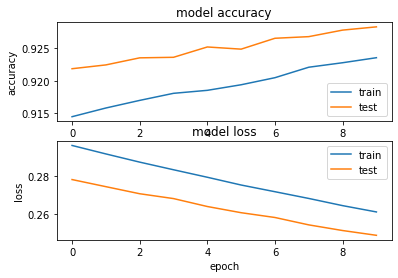

In [13]:

hist = model2.fit(X_train, y_train, validation_split=0.2, epochs=10)


plt.subplot(2,1,1)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.subplot(2,1,2)
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [14]:
model3 = tf.keras.models.Sequential([
 tf.keras.layers.Flatten(input_shape=(28, 28)),
 tf.keras.layers.Dense(128, activation='sigmoid'),
 tf.keras.layers.Dense(128, activation='sigmoid'),
 tf.keras.layers.Dropout(0.2),
 tf.keras.layers.Dense(10)])

model3.compile(optimizer='SGD',
 loss=loss_fn,
 metrics=['accuracy'])
model3.fit(X_train, y_train, validation_split=0.2,  epochs=10)


scores4 = model3.evaluate(X_test, y_test, verbose=2)
print("Baseline Error: %.2f%%" % (100-scores4[1]*100))
print("Accuracy: %.2f%%" % (scores4[1]*100))

Epoch 1/10
1500/1500 [==============================] - 5s 3ms/step - loss: 2.2839 - accuracy: 0.1527 - val_loss: 2.1431 - val_accuracy: 0.4978
Epoch 2/10
1500/1500 [==============================] - 5s 3ms/step - loss: 2.0080 - accuracy: 0.3484 - val_loss: 1.7088 - val_accuracy: 0.6737
Epoch 3/10
1500/1500 [==============================] - 5s 3ms/step - loss: 1.4953 - accuracy: 0.5565 - val_loss: 1.1648 - val_accuracy: 0.7388
Epoch 4/10
1500/1500 [==============================] - 4s 3ms/step - loss: 1.0943 - accuracy: 0.6728 - val_loss: 0.8610 - val_accuracy: 0.7940
Epoch 5/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.8746 - accuracy: 0.7355 - val_loss: 0.7006 - val_accuracy: 0.8230
Epoch 6/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.7412 - accuracy: 0.7769 - val_loss: 0.6025 - val_accuracy: 0.8436
Epoch 7/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.6610 - accuracy: 0.7998 - val_loss: 0.5386 - val_accuracy:

Q4-Now train the model again with adding stochastic gradient descent with batch size of 200. What do you expect to be changed? Speed or accuracy?

Reducing the batch size to 200 will decrease processing speed but increases model accuracy.

In [15]:
model3.compile(optimizer='SGD',
 loss=loss_fn,
 metrics=['accuracy'])
model3.fit(X_train, y_train, validation_split=0.2,  epochs=10, batch_size=200)

scores5 = model3.evaluate(X_test, y_test, verbose=2)
print("Baseline Error: %.2f%%" % (100-scores5[1]*100))
print("Accuracy: %.2f%%" % (scores5[1]*100))

Epoch 1/10
240/240 [==============================] - 1s 5ms/step - loss: 0.5037 - accuracy: 0.8519 - val_loss: 0.4281 - val_accuracy: 0.8834
Epoch 2/10
240/240 [==============================] - 1s 5ms/step - loss: 0.5011 - accuracy: 0.8521 - val_loss: 0.4243 - val_accuracy: 0.8833
Epoch 3/10
240/240 [==============================] - 1s 5ms/step - loss: 0.4968 - accuracy: 0.8546 - val_loss: 0.4209 - val_accuracy: 0.8848
Epoch 4/10
240/240 [==============================] - 1s 6ms/step - loss: 0.4932 - accuracy: 0.8550 - val_loss: 0.4175 - val_accuracy: 0.8856
Epoch 5/10
240/240 [==============================] - 1s 6ms/step - loss: 0.4905 - accuracy: 0.8570 - val_loss: 0.4142 - val_accuracy: 0.8867
Epoch 6/10
240/240 [==============================] - 2s 6ms/step - loss: 0.4852 - accuracy: 0.8590 - val_loss: 0.4111 - val_accuracy: 0.8870
Epoch 7/10
240/240 [==============================] - 1s 5ms/step - loss: 0.4817 - accuracy: 0.8575 - val_loss: 0.4079 - val_accuracy: 0.8876
Epoch 

Q5-Design a neural network with 2 hidden layers (hidden layer 1 with 12 nodes and hidden layer 2 with 8 nodes), report the accuracy and draw the learning curves. Apply a dropout to see if you could get any better result.Use ‘adam’as optimizer. 

Adding a dropout for the above final increases the accuracy from 60% to 63%.

In [19]:
import pandas as pd

file = 'C:/Users/nagar/Documents/ANLY 535 Machine Learning/pima-indians-diabetes.csv' 

dataframe = pd.read_csv(file) 

y = dataframe['diabete'] 
X = dataframe.drop(['ID','diabete'], axis=1)

from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1234)

import tensorflow as tf 

model_str1 = tf.keras.models.Sequential([   
tf.keras.layers.Flatten(input_shape=(8, )),   
tf.keras.layers.Dense(12, activation='sigmoid'),   
tf.keras.layers.Dense(8) 
])

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) 

model_str1.compile(optimizer='adam',
loss=loss_fn,
metrics=['accuracy']) 

#Checking accuracy and error rate

scores6 = model_str1.evaluate(X_test, y_test, verbose=2)
print("Baseline Error: %.2f%%" % (100-scores6[1]*100))
print("Accuracy: %.2f%%" % (scores6[1]*100))

hist2 = model_str1.fit(X_train, y_train, epochs=10) 

5/5 - 0s - loss: 1.4186 - accuracy: 0.6039
Baseline Error: 39.61%
Accuracy: 60.39%
Epoch 1/10
20/20 [==============================] - 0s 746us/step - loss: 1.3114 - accuracy: 0.6498
Epoch 2/10
20/20 [==============================] - 0s 2ms/step - loss: 1.1199 - accuracy: 0.6531
Epoch 3/10
20/20 [==============================] - 0s 4ms/step - loss: 0.9740 - accuracy: 0.6531
Epoch 4/10
20/20 [==============================] - 0s 4ms/step - loss: 0.8808 - accuracy: 0.6531
Epoch 5/10
20/20 [==============================] - 0s 5ms/step - loss: 0.8242 - accuracy: 0.6531
Epoch 6/10
20/20 [==============================] - 0s 5ms/step - loss: 0.7866 - accuracy: 0.6531
Epoch 7/10
20/20 [==============================] - 0s 4ms/step - loss: 0.7603 - accuracy: 0.6531
Epoch 8/10
20/20 [==============================] - 0s 4ms/step - loss: 0.7391 - accuracy: 0.6531
Epoch 9/10
20/20 [==============================] - 0s 3ms/step - loss: 0.7227 - accuracy: 0.6531
Epoch 10/10
20/20 [==============

In [17]:
model_str2 = tf.keras.models.Sequential([   
tf.keras.layers.Flatten(input_shape=(8, )),   
tf.keras.layers.Dense(12, activation='sigmoid'),   
tf.keras.layers.Dropout(0.2),     
tf.keras.layers.Dense(8) 
])

model_str2.compile(optimizer='adam',
loss=loss_fn,
metrics=['accuracy']) 
hist3 =model_str2.fit(X_train, y_train, epochs=10) 

#Checking accuracy and error rate
scores7 = model_str2.evaluate(X_test, y_test, verbose=2)
print("Baseline Error: %.2f%%" % (100-scores7[1]*100))
print("Accuracy: %.2f%%" % (scores7[1]*100))

Epoch 1/10
20/20 [==============================] - 0s 740us/step - loss: 1.9040 - accuracy: 0.3811
Epoch 2/10
20/20 [==============================] - 0s 2ms/step - loss: 1.7199 - accuracy: 0.5326
Epoch 3/10
20/20 [==============================] - 0s 2ms/step - loss: 1.5780 - accuracy: 0.5765
Epoch 4/10
20/20 [==============================] - 0s 3ms/step - loss: 1.4680 - accuracy: 0.6042
Epoch 5/10
20/20 [==============================] - 0s 3ms/step - loss: 1.4041 - accuracy: 0.6075
Epoch 6/10
20/20 [==============================] - 0s 3ms/step - loss: 1.3154 - accuracy: 0.6336
Epoch 7/10
20/20 [==============================] - 0s 3ms/step - loss: 1.1659 - accuracy: 0.6417
Epoch 8/10
20/20 [==============================] - 0s 4ms/step - loss: 1.0624 - accuracy: 0.6417
Epoch 9/10
20/20 [==============================] - 0s 4ms/step - loss: 1.0344 - accuracy: 0.6287
Epoch 10/10
20/20 [==============================] - 0s 4ms/step - loss: 0.9952 - accuracy: 0.6352
5/5 - 0s - loss: 

Text(0.5, 1.0, 'model accuracy with dropout')

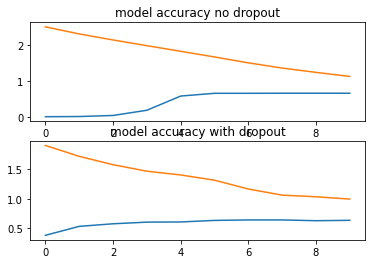

In [18]:
import matplotlib.pyplot as plt

#Plotting without dropout
plt.subplot(2,1,1) 
plt.plot(hist2.history['accuracy']) 
plt.plot(hist2.history['loss']) 
plt.title('model accuracy no dropout') 

#Now plotting this with dropout
plt.subplot(2,1,2) 
plt.plot(hist3.history['accuracy']) 
plt.plot(hist3.history['loss']) 
plt.title('model accuracy with dropout')